# Importando a biblioteca pandas

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import zconfint
from scipy.stats import ranksums
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest

# Carregando dados

In [27]:
tmdb = pd.read_csv("../01.Dados/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### <span style='color:red'> Observe que os dados estão mau tabulados. </span>

## Obtendo a descrição dos dados

In [28]:
tmdb.describe().round(2) #informação tabular

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.00,4803.00,4.803000e+03,4801.00,4803.00,4803.00
mean,2.904504e+07,57165.48,21.49,8.226064e+07,106.88,6.09,690.22
std,4.072239e+07,88694.61,31.82,1.628571e+08,22.61,1.19,1234.59
min,0.000000e+00,5.00,0.00,0.000000e+00,0.00,0.00,0.00
25%,7.900000e+05,9014.50,4.67,0.000000e+00,94.00,5.60,54.00
50%,1.500000e+07,14629.00,12.92,1.917000e+07,103.00,6.20,235.00
75%,4.000000e+07,58610.50,28.31,9.291719e+07,118.00,6.80,737.00
max,3.800000e+08,459488.00,875.58,2.787965e+09,338.00,10.00,13752.00


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

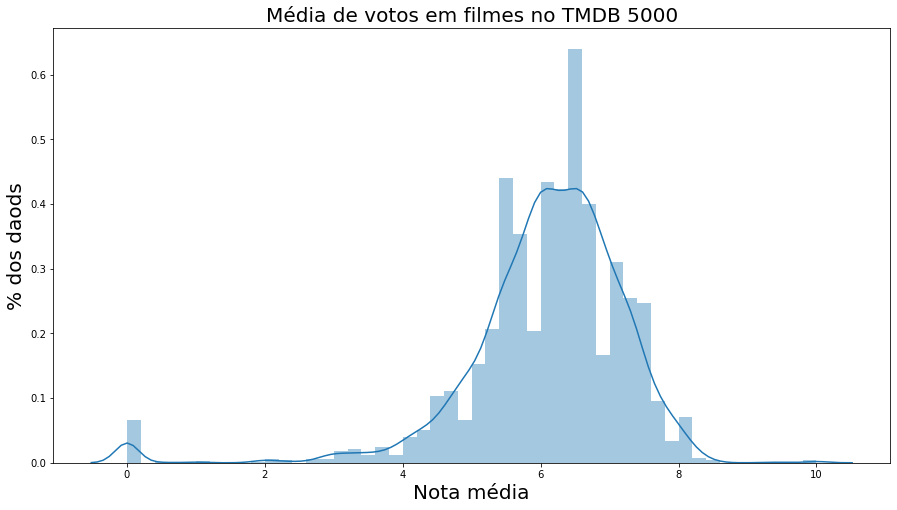

In [29]:
#informação gráfica

# quando usa ax é que vai mecher com os eixos
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.vote_average)

#Vai normalizar pra a soma de tudo seja 1
ax.set_xlabel("Nota média",fontsize=20)
ax.set_ylabel("% dos daods",fontsize=20)
ax.set_title("Média de votos em filmes no TMDB 5000",fontsize=20)

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

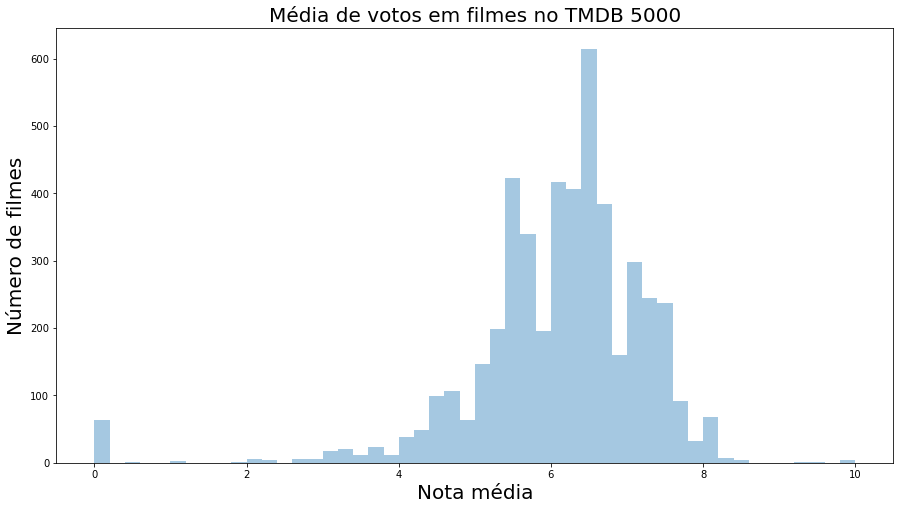

In [30]:
# faz a normalização por padrão(kde padrão)
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.vote_average,kde=False)

#Vai normalizar pra a soma de tudo seja 1
ax.set_xlabel("Nota média",fontsize=20)
ax.set_ylabel("Número de filmes",fontsize=20)
ax.set_title("Média de votos em filmes no TMDB 5000",fontsize=20)

Text(0.5, 0, 'Nota média do filme')

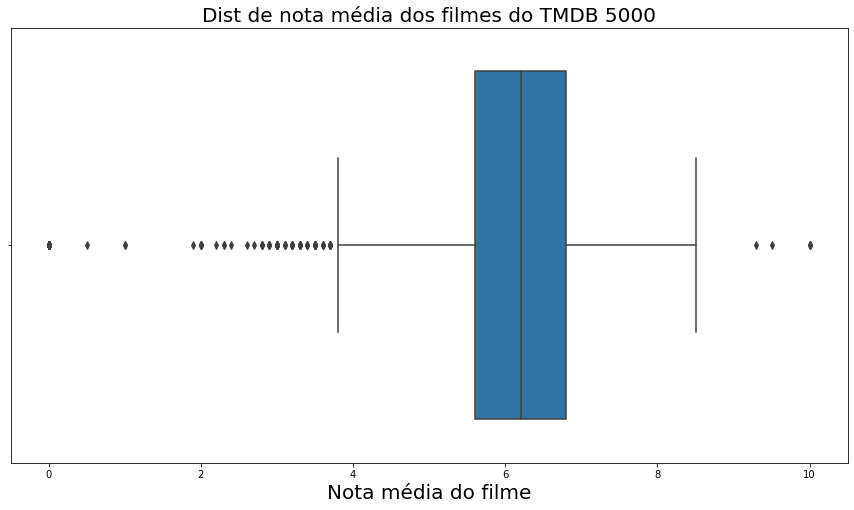

In [31]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=tmdb.vote_average)
ax.set_title('Dist de nota média dos filmes do TMDB 5000',fontsize=20)
ax.set_xlabel("Nota média do filme",fontsize=20)

# Tem algo estranho com esses dados, nota média = 0

In [32]:
tmdb.query("vote_average==0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


### <span style='color:red'> Estes filmes não foram vistos por niguém, por isso que a média é zero. Logo, vamos retirá-los e adicionar filmes onde o vote_count é maior ou igual a 10. </span>

## Descrição dos dados após retirar as médias = 0

In [33]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe().round(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.00,4392.00,4.392000e+03,4391.00,4392.00,4392.00
mean,3.164545e+07,49204.12,23.45,8.990969e+07,108.43,6.23,754.44
std,4.162736e+07,80136.25,32.59,1.682870e+08,21.01,0.89,1272.26
min,0.000000e+00,5.00,0.01,0.000000e+00,0.00,1.90,10.00
25%,2.895962e+06,8403.50,6.51,1.365700e+04,95.00,5.70,83.75
50%,1.700000e+07,13084.50,14.83,2.685837e+07,105.00,6.30,288.50
75%,4.200000e+07,46831.25,30.26,1.022818e+08,118.50,6.80,831.00
max,3.800000e+08,417859.00,875.58,2.787965e+09,338.00,8.50,13752.00


### Agora os dados estão mais comportados, pois está mais parecendo com uma distribuição normal, apenas um pouco assimétrica a direta, ou seja, os usuários dão mais notas próximas a 10 do que zero.

[Text(0.5, 0, 'Nota média do filme')]

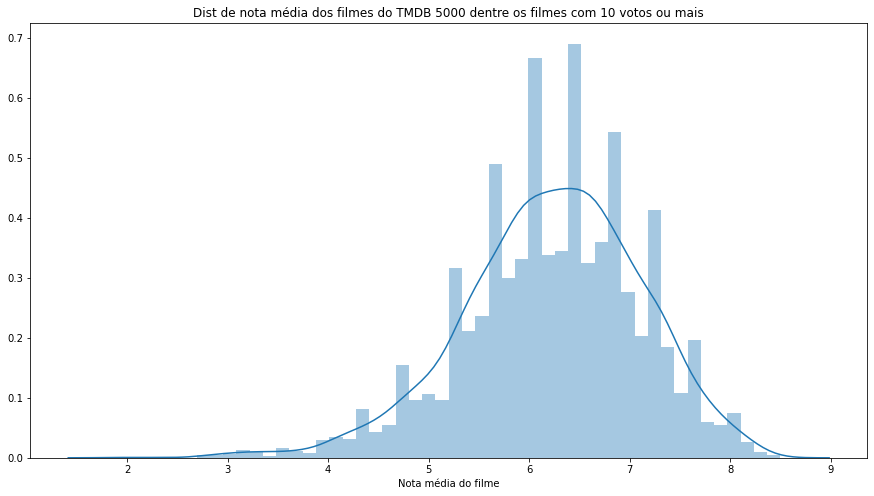

In [34]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set_title('Dist de nota média dos filmes do TMDB 5000 dentre os filmes com 10 votos ou mais')
ax.set(xlabel="Nota média do filme")

[Text(0.5, 0, 'Nota média do filme')]

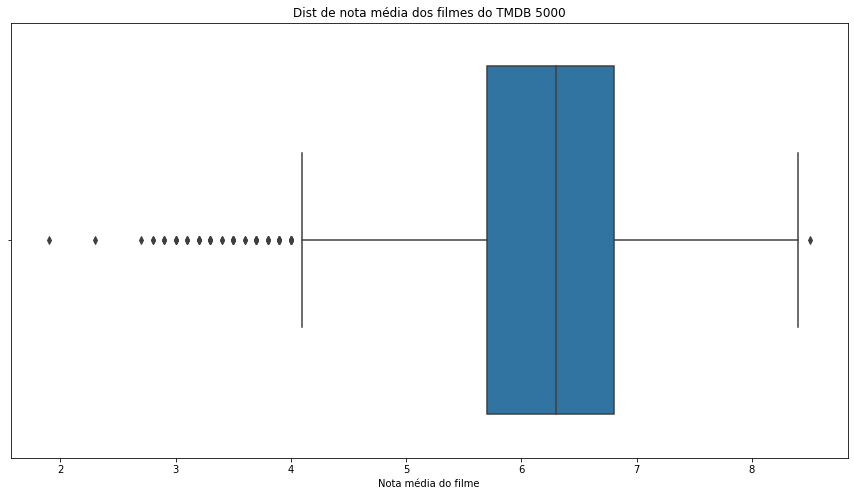

In [35]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set_title('Dist de nota média dos filmes do TMDB 5000')
ax.set(xlabel="Nota média do filme")

# Analisaremos também o movielens

In [36]:
notas = pd.read_csv('../01.Dados/ratings.csv')
notas.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [37]:
notas_media_por_filme = notas.groupby('movieId').mean().round(2)['rating']
notas_media_por_filme.head(10)

movieId
1     3.92
2     3.43
3     3.26
4     2.36
5     3.07
6     3.95
7     3.19
8     2.88
9     3.12
10    3.50
Name: rating, dtype: float64

Text(0.5, 0, 'Nota média do filme')

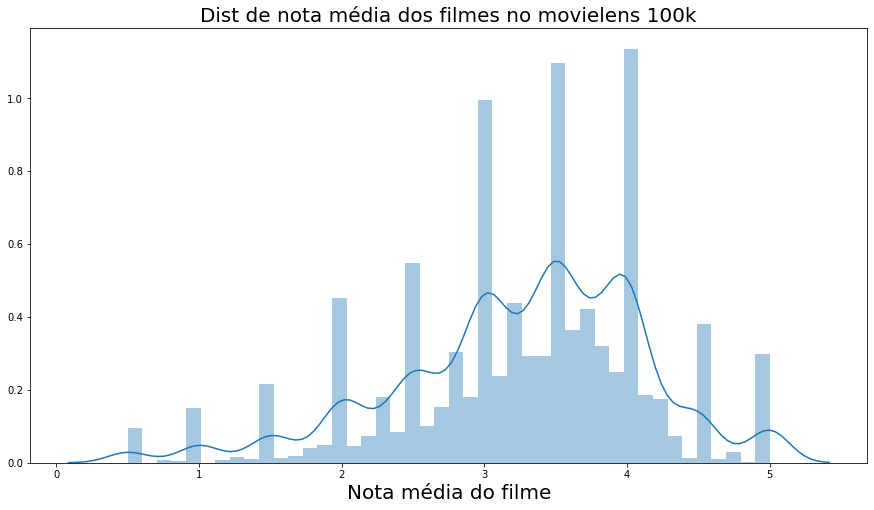

In [38]:
plt.figure(figsize=(15,8))
ax = sns.distplot(notas_media_por_filme.values)#.values, pegar valores de uma séria
ax.set_title('Dist de nota média dos filmes no movielens 100k',fontsize=20)
ax.set_xlabel("Nota média do filme",fontsize=20)

Temos filmes com nota média 5, pode ser o caso em que houve poucos votos em relação outros demais filmes.

In [39]:
notas.groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


Obeserve filmes que foram vistos apenas uma vez

In [40]:
filmes_com_mais_de_10_votos = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = filmes_com_mais_de_10_votos.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values # .values vai extrair valores dentro de uma série

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [41]:
notas_media_por_filme.loc[[1,2,4,5]] # .loc, localiza uma tupla no df

movieId
1    3.92
2    3.43
4    2.36
5    3.07
Name: rating, dtype: float64

In [42]:
notas_media_com_filmes_com_10_votos = notas_media_por_filme.loc[filmes_com_pelo_menos_10_votos] # .loc, localiza uma tupla no df
notas_media_com_filmes_com_10_votos

movieId
1         3.92
2         3.43
3         3.26
5         3.07
6         3.95
          ... 
174055    3.42
176371    3.81
177765    3.54
179819    3.12
187593    3.88
Name: rating, Length: 2269, dtype: float64

Text(0.5, 0, 'Nota média do filme')

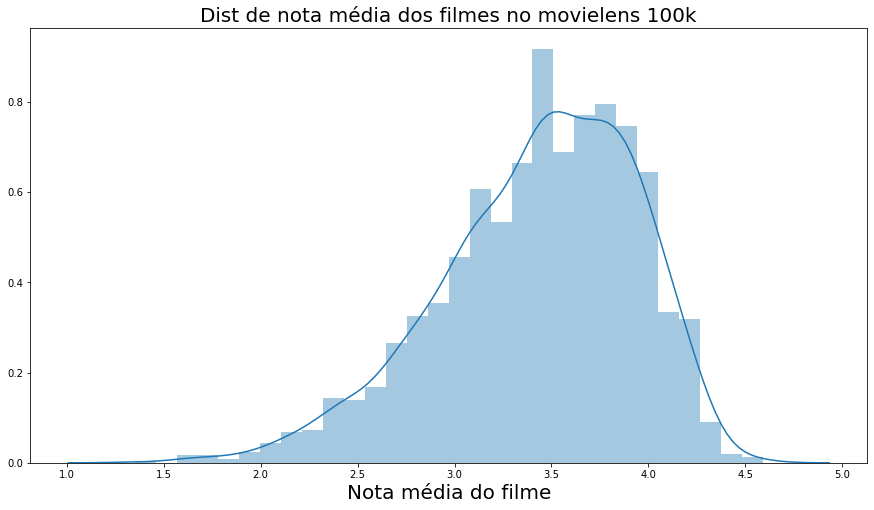

In [43]:
plt.figure(figsize=(15,8))
ax = sns.distplot(notas_media_com_filmes_com_10_votos.values)#.values, pegar valores de uma séria
ax.set_title('Dist de nota média dos filmes no movielens 100k',fontsize=20)
ax.set_xlabel("Nota média do filme",fontsize=20)

Veja agora, agora temos filmes os filmes com pelo menos 10 votos, a distribuiçao se assemelha melhor a dist. normal(assimétrica a direita)

Text(0.5, 1.0, 'Nota média dos filmes com pelo menos 10 votos')

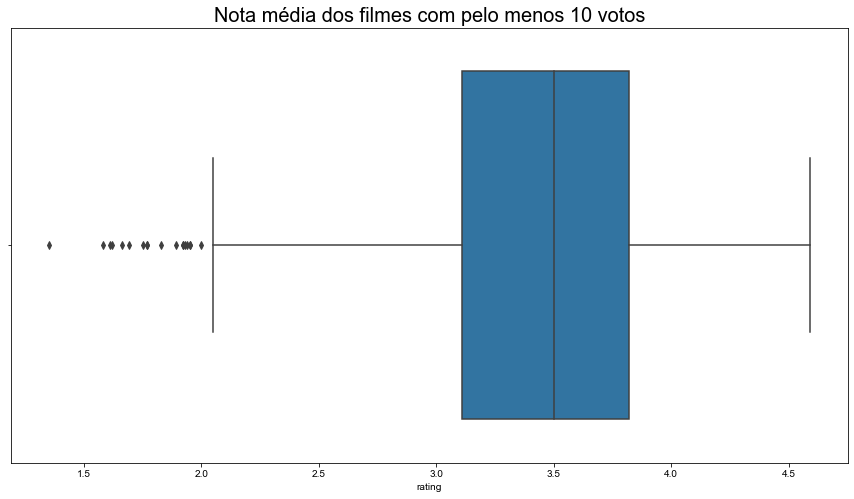

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(notas_media_com_filmes_com_10_votos)
sns.set_style('darkgrid')
ax.set_title("Nota média dos filmes com pelo menos 10 votos",fontsize=20)

## Gráfico cumulativo, para comparar quantos filmes tem nota de um valor qualquer

Text(0, 0.5, 'Porcentagem cumulativa das notas')

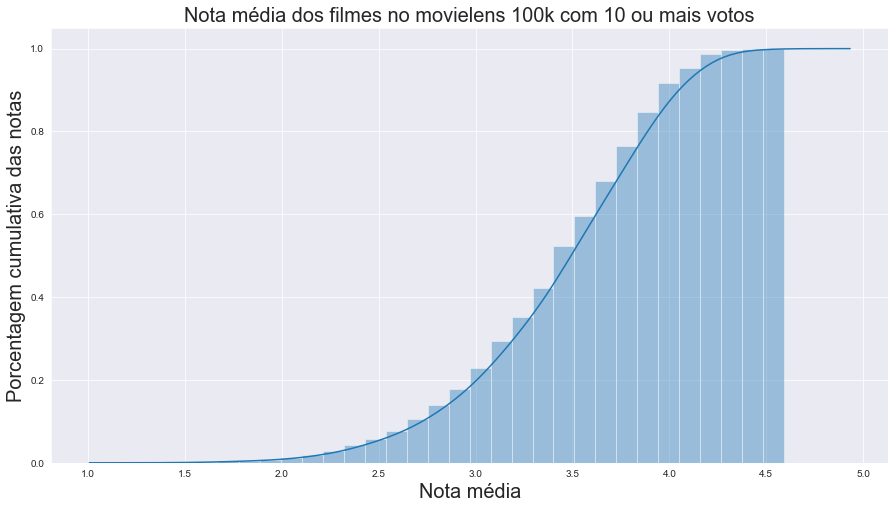

In [45]:
plt.figure(figsize=(15,8))
ax = sns.distplot(notas_media_com_filmes_com_10_votos,
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.set_title("Nota média dos filmes no movielens 100k com 10 ou mais votos",fontsize=20)
ax.set_xlabel("Nota média",fontsize=20)
ax.set_ylabel("Porcentagem cumulativa das notas",fontsize=20)

## Analisando a distribuição dos dados capturados de outros campos do TMBD

In [46]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

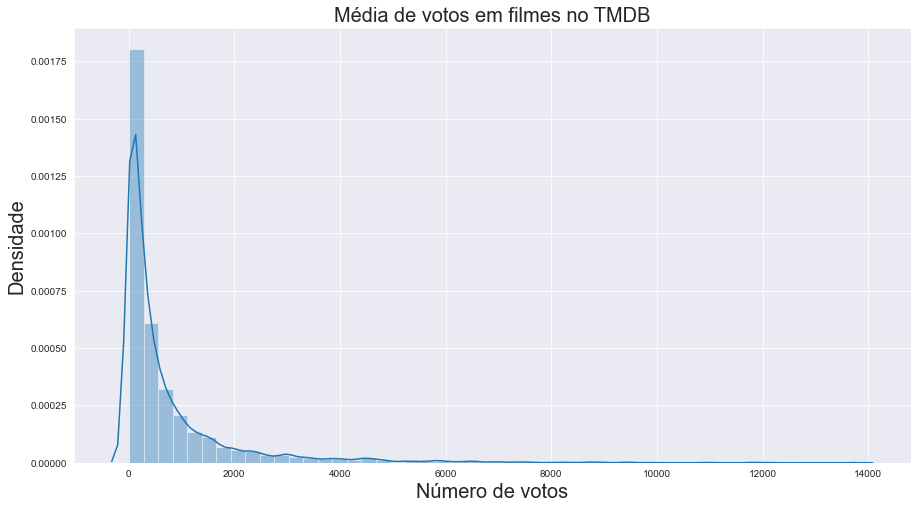

In [48]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set_xlabel("Número de votos",fontsize=20)
ax.set_ylabel("Densidade",fontsize=20)
ax.set_title("Média de votos em filmes no TMDB",fontsize=20)

tmdb_com_mais_de_10_votos.vote_count

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

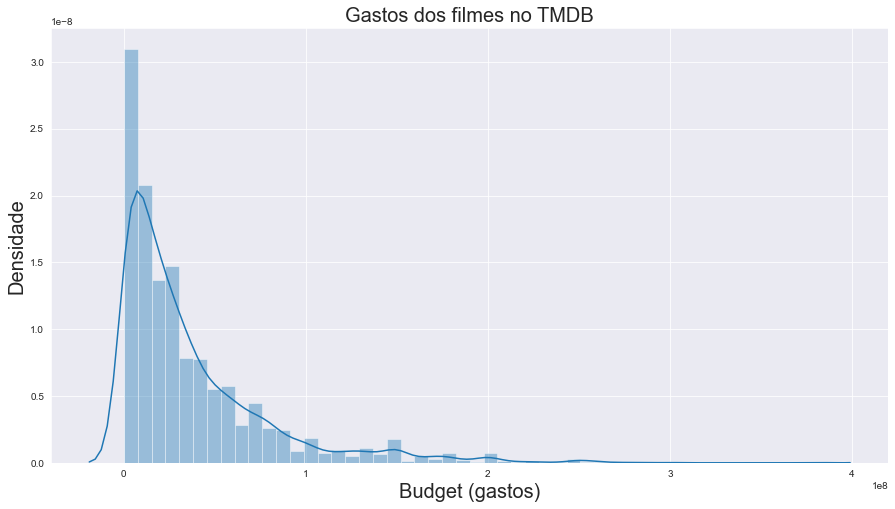

In [49]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.query('budget>0').budget)
ax.set_xlabel("Budget (gastos)",fontsize=20)
ax.set_ylabel("Densidade",fontsize=20)
ax.set_title("Gastos dos filmes no TMDB",fontsize=20)

tmdb_com_mais_de_10_votos.vote_count

In [50]:
tmdb.query("popularity == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

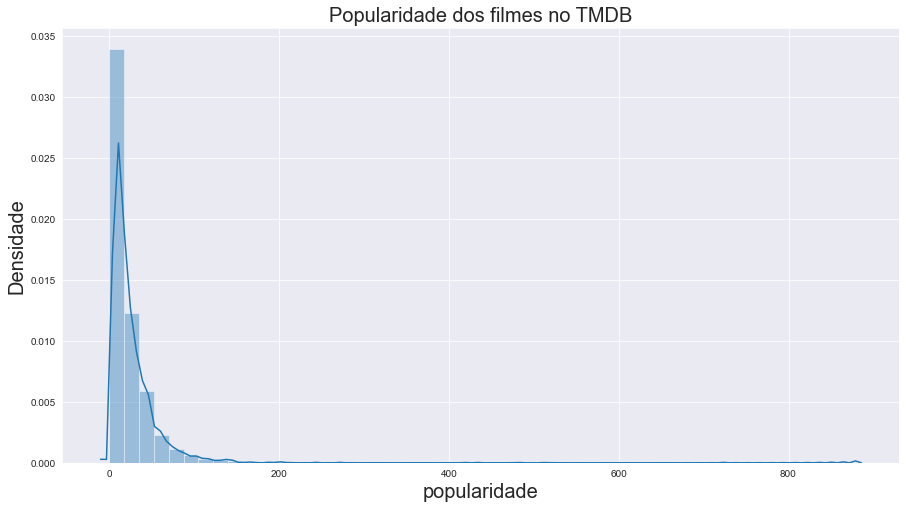

In [51]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.popularity)
ax.set_xlabel("popularidade",fontsize=20)
ax.set_ylabel("Densidade",fontsize=20)
ax.set_title("Popularidade dos filmes no TMDB",fontsize=20)

tmdb_com_mais_de_10_votos.vote_count

In [52]:
tmdb.runtime.isnull().sum() # existe dois filmes sem tempo, estranho

2

In [53]:
tmdb.runtime.dropna()# apagando os nulos

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4801, dtype: float64

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

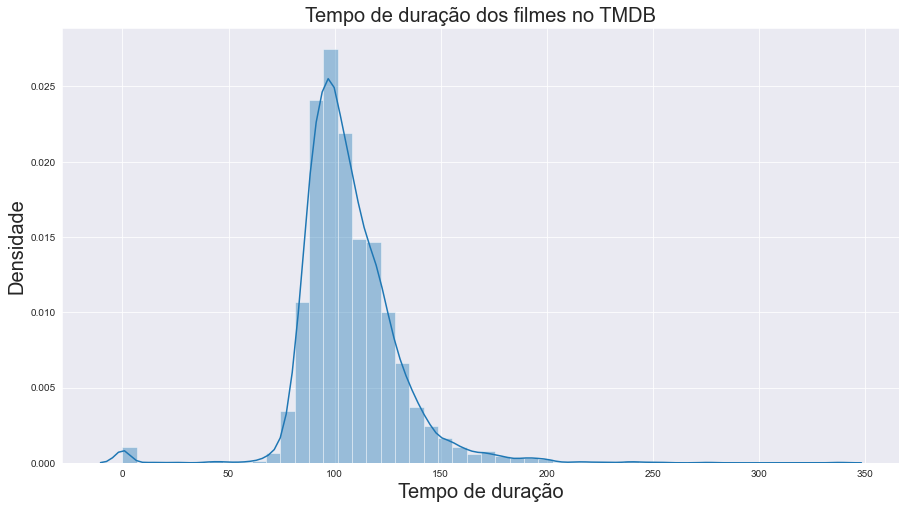

In [57]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.runtime.dropna())
ax.set_xlabel("Tempo de duração",fontsize=20)
ax.set_ylabel("Densidade",fontsize=20)
ax.set_title("Tempo de duração dos filmes no TMDB",fontsize=20)

tmdb_com_mais_de_10_votos.vote_count

Foi retirados os filmes com tempo nulo, mas ainda existe filmes com tempo zero.

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

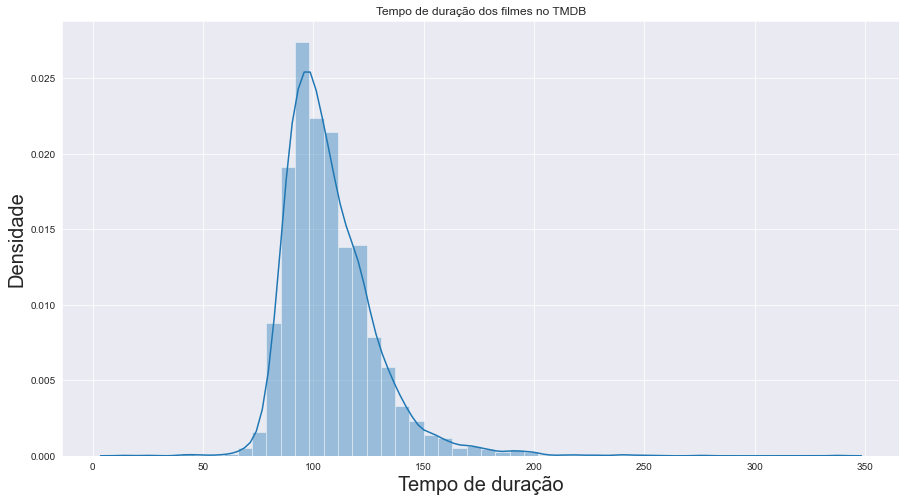

In [58]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.query("runtime>0").runtime)
ax.set_xlabel("Tempo de duração",fontsize=20)
ax.set_ylabel("Densidade",fontsize=20)
ax.set_title("Tempo de duração dos filmes no TMDB",fontsize=20)

tmdb_com_mais_de_10_votos.vote_count

Agora foi eliminados os filmes que com tempo zerado, veja que a curva parece mais com uma distribuição normal.

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

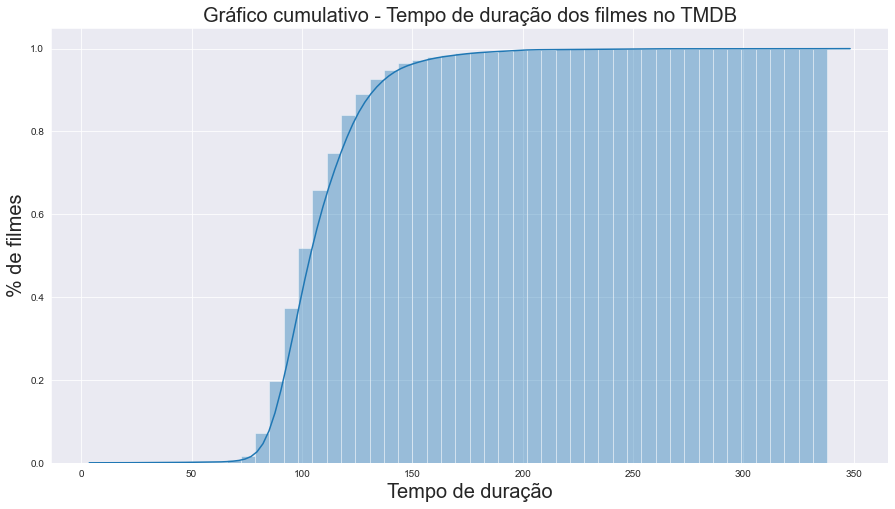

In [60]:
plt.figure(figsize=(15,8))
ax = sns.distplot(tmdb.query("runtime>0").runtime.dropna(),
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})

ax.set_xlabel("Tempo de duração",fontsize=20)
ax.set_ylabel("% de filmes",fontsize=20)
ax.set_title("Gráfico cumulativo - Tempo de duração dos filmes no TMDB",fontsize=20)
tmdb_com_mais_de_10_votos.vote_count

## Divindo o df em porcentagem usando o .quantile do pandas

In [61]:
tmdb.query('runtime>0').runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [62]:
print("Média dos filmes com pelo menos 10 votos: {}".format(notas_media_com_filmes_com_10_votos.mean().round(2)))

Média dos filmes com pelo menos 10 votos: 3.43


In [63]:
np.random.seed(75243)
#Aleatorizar a amostragem
temp = notas_media_com_filmes_com_10_votos.sample(frac=1)

"""
medias = list()
for i in range(1,len(temp)):
    medias.append(temp[0:i].mean())
"""

#List compreesion
medias = [temp[0:i].mean() for i in range(1,len(temp))]


#A média representa a do mundo real?    
plt.figure(figsize=(15,8))
plt.plot(medias)

Este eh o gráfico para ver o comportamento da média com a inserção dos novos dados, veja que a medida que
vou colocar mais dados tende a chegar um denominador comum. Porém, todos estes dados trabalhados aqui foram apenas
de amostras, agora vamos usar a estatística para se aproximar do mundo real.

(3.411296914967096, 3.4529075804053146)

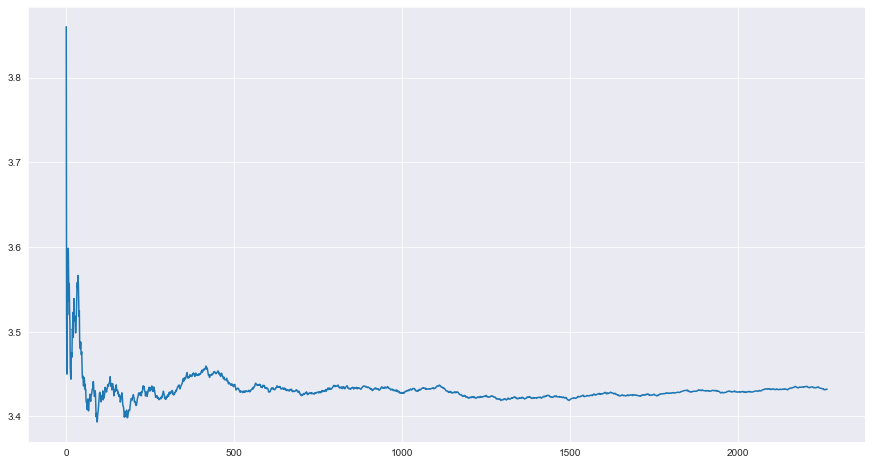

In [64]:
#Teste z(para conjunto maior) e teste t(para conjunto menor)
zconfint(notas_media_com_filmes_com_10_votos)

Calculo do intervalor de confiança da média usando o test z(ou pode usar o test t, caso seja um conjunto 
pequeno de dados).

In [65]:
from statsmodels.stats.weightstats import DescrStatsW

#Aplicando o teste t
descr_todos_com_10_votos = DescrStatsW(notas_media_com_filmes_com_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.4112858059476436, 3.452918689424767)

# Vamos ver o filme 1..

In [68]:
filmes = pd.read_csv('../01.Dados/movies.csv')
filmes.query('movieId==1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [69]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Text(0.5, 1.0, 'Distribuição das notas para o ToyStoy')

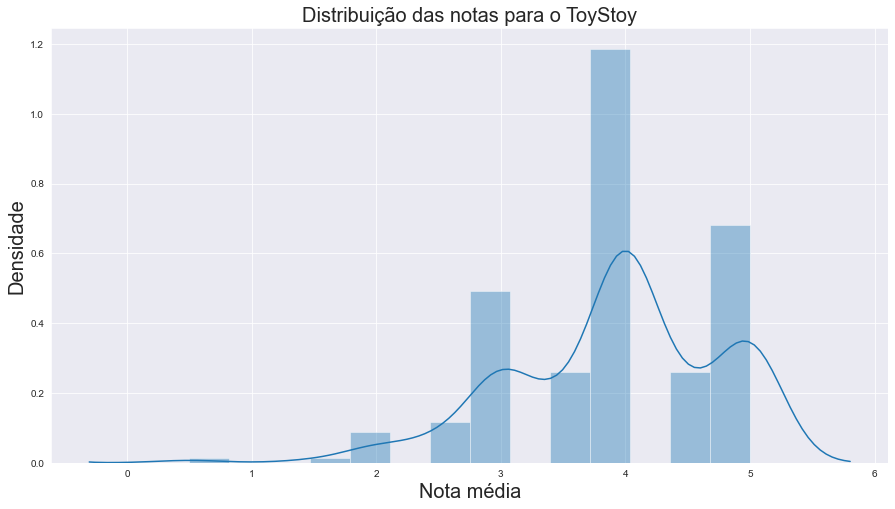

In [71]:
plt.figure(figsize=(15,8))
ax = sns.distplot(notas1.rating)

ax.set_xlabel('Nota média',fontsize=20)
ax.set_ylabel('Densidade',fontsize=20)
ax.set_title('Distribuição das notas para o ToyStoy',fontsize=20)

Text(0.5, 1.0, 'Distribuição das notas para o ToyStoy')

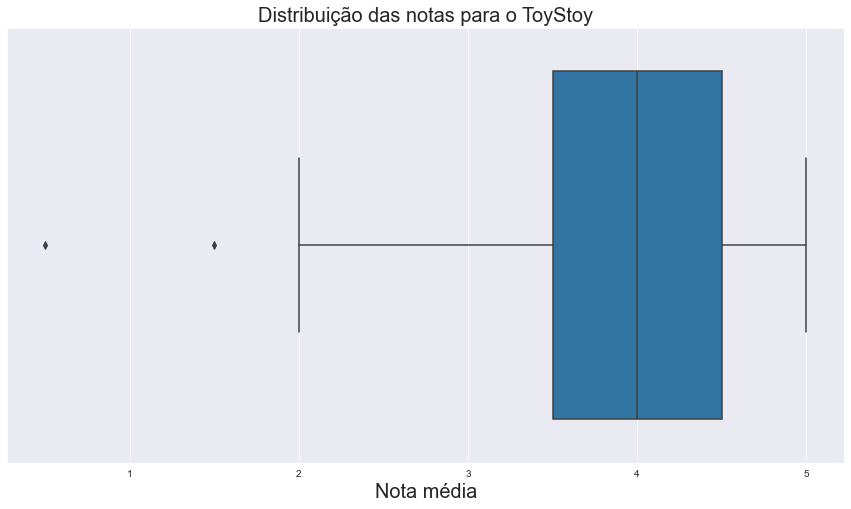

In [72]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(notas1.rating)
ax.set_xlabel('Nota média',fontsize=20)
ax.set_title('Distribuição das notas para o ToyStoy',fontsize=20)

In [73]:
notas1.rating.mean()

3.9209302325581397

In [74]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [75]:
#Vai testar se a média do conjunto todo representa realmente o conjunto todo.
ztest(notas1.rating, value=notas_media_com_filmes_com_10_votos.mean())#(nota,pvalue)

(8.585430645254432, 9.04967858140947e-18)

Se pvalue<=0.05, me diz que a média do subconjunto não igual a média do conjunto todo. Logo, aqui mostra 
que a média dos filmes do ToyStoy não é igual a média de todos os filmes do tmdb.

In [76]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat,p = ztest(temp[0:i], value =notas_media_com_filmes_com_10_votos.mean())
    return (i,media,p)
valores = np.array([calcula_teste(i) for i in range(2,len(temp))]    )

plt.figure(figsize=(15,8))
plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y=0.05,xmin=2,xmax=len(temp),color='black')

Teste para ver se o t test funciona a partir de quantos dados na base.

# Comparação de dois conjuntos de amostras

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

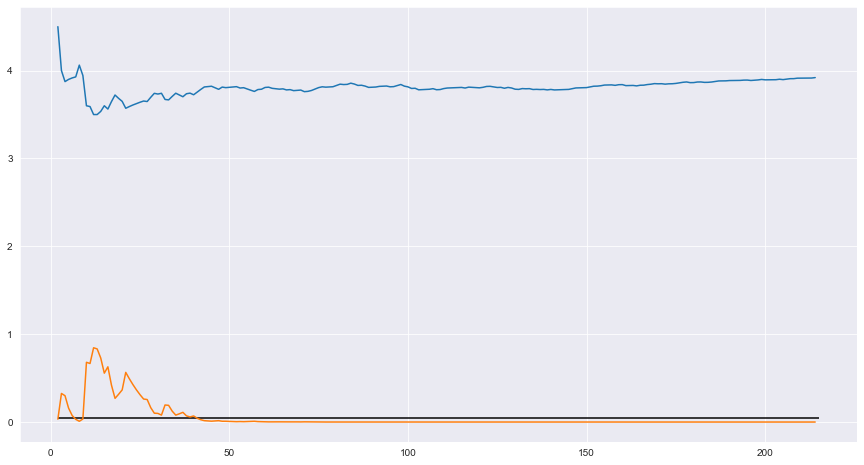

In [77]:
print(ztest(notas1.rating,notas.rating))
zconfint(notas1.rating,notas.rating)

In [78]:
from scipy.stats import ttest_ind

#Teste t para dois conjunto de dados
ttest_ind(notas.rating,notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [79]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [80]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

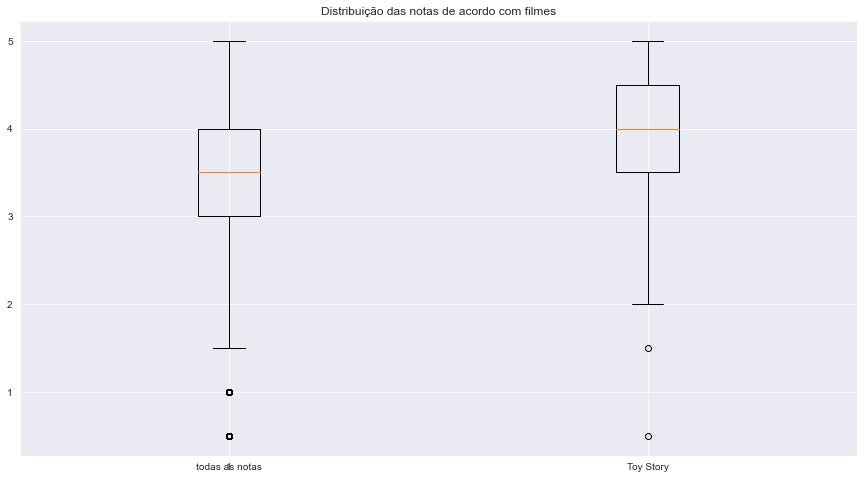

In [81]:
plt.figure(figsize=(15,8))
plt.boxplot(notas.rating)
plt.boxplot([notas.rating,notas1.rating],labels=['todas as notas','Toy Story'])
plt.title('Distribuição das notas de acordo com filmes')

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

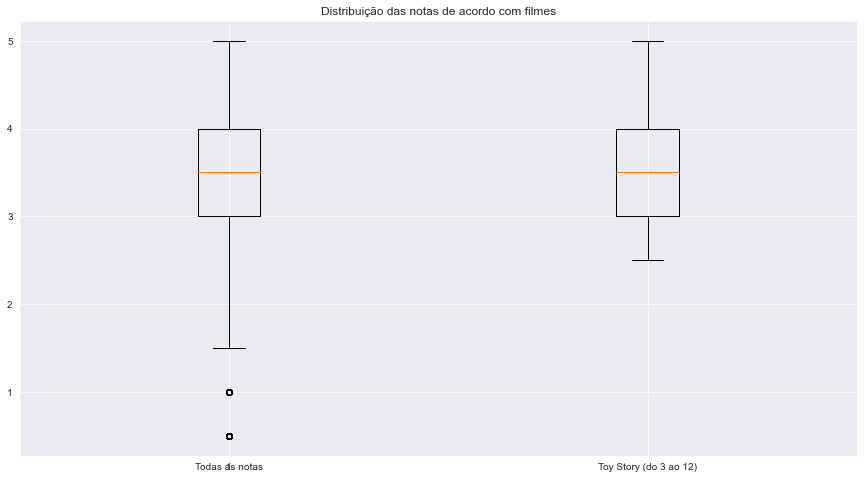

In [82]:
plt.figure(figsize=(15,8))
plt.boxplot(notas.rating)
plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title('Distribuição das notas de acordo com filmes')

In [83]:
plt.figure(figsize=(15,8))
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


<Figure size 1080x576 with 0 Axes>

Observe o pvalue,diferença muito grande, por isso não use teste t para pequenos dados.

# Comparar a média de dois outros filmes 

In [84]:
filmes.query('movieId in [1,593,72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

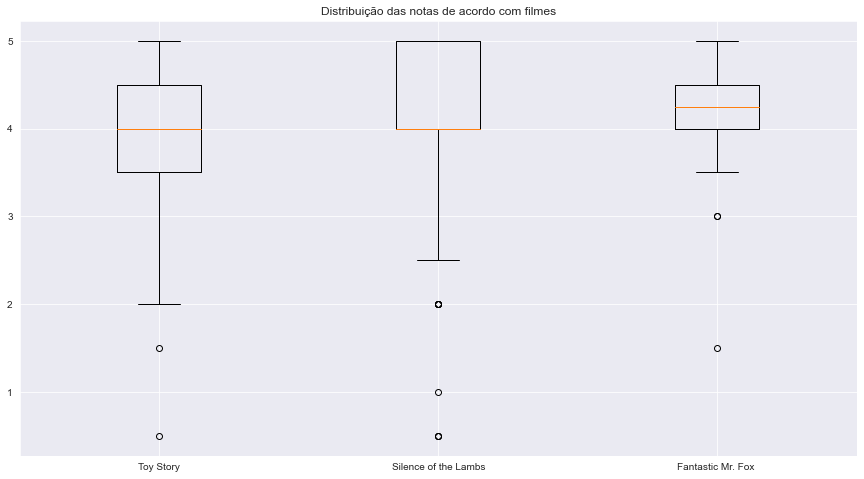

In [85]:
notas1 = notas.query('movieId == 1')
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.figure(figsize=(15,8))
plt.boxplot([notas1.rating, notas593.rating,notas72226.rating], labels=["Toy Story","Silence of the Lambs","Fantastic Mr. Fox "])
plt.title('Distribuição das notas de acordo com filmes')

In [86]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


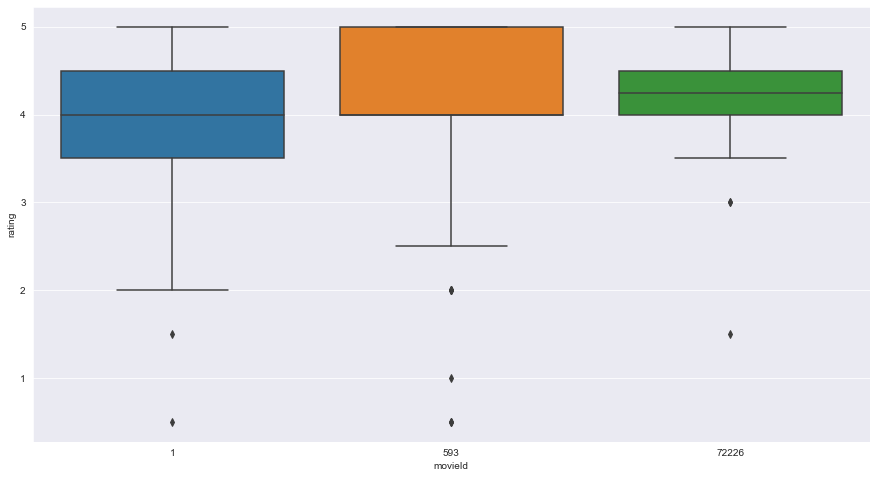

In [90]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='movieId', y='rating', data=notas.query('movieId in (1,593,72226)'))

In [91]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [92]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [93]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_593.get_compare(descr_72226)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


In [94]:
comparacao = descr_1.get_compare(descr_72226)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [95]:
notas.query('movieId in (1,593,72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


### Cuidado com a sequencia de teste que você faz, pois pode influenciar na descição. Então faça:
- 1: Olhe se pode usar o z test
- 2: Se não use o t test
- 3: Após isso use gráficos

Detalhe, o z e t test assume que os dados se comportam em uma distribuição normal. Logo, como vamos saber se os dados se comportam como uma distribuição normal?

R - use o nomraltest do SciPy

In [96]:
_,p = normaltest(notas1.rating)
p

0.00011053430732728716

isso mostra que o p<=0.05 isso diz que não é uma distribuição normal, por isso não podemos utilizar o teste t e z,
mas para outros tipos de distribuição.Logo, existe os testes não-paramétricos.

In [97]:
# Exemplo de teste não paramétrico, teste de ranqueamento
_,p = ranksums(notas1.rating, notas593.rating)
p

0.0003267718756440693

- Hipótese nula: quando os dados vieram do mesmo conjunto.
- Se p<= 0.05 então que as amostras de um conjunto tendem a serem maiores do que a do outro.

Uma distribução não-paramétrica, não conseguimos analisar o pvalues pela a média só apenas comprar amostras aleatŕoias dos conjuntos. Portanto, com o resutado acima, diz que a notas do filme "Silence of the Lambs" é 
maior que as do "Toy Story".